**MUMBAI RESTAURANTS TOUR**

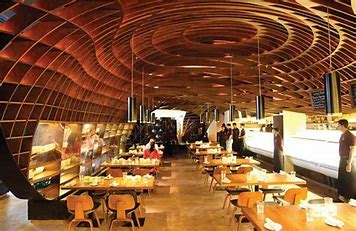

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mumbai-restaurants-trip-advisor-dataset/tripadvisor.csv


In [2]:
#reading the retaurants data
data = pd.read_csv('/kaggle/input/mumbai-restaurants-trip-advisor-dataset/tripadvisor.csv')
data.head()

name                                            address  \
0      1 Tablespoon  23, Ram Villa, Opposite Sahkari Bhandar, Matun...   
1  10th Street Cafe  Khar Pali Road, Road No 10, Khar Shop No 3 & 4...   
2  10th Street Cafe  10th Road , Shop No 8 , Sukhmani Himalaya Coop...   
3     1441 Pizzeria  Raj Infinia, Evershine Nagar Malad West Near M...   
4     1441 Pizzeria           Senapati Bapat Road, Mumbai 400053 India   

              Phone  price_range_from  price_range_to  \
0  +91 22 2403 3441               NaN             NaN   
1   +91 87790 92308               NaN             NaN   
2  +91 22 2628 2826               NaN             NaN   
3   +91 80970 81441             245.0           645.0   
4   +91 84549 14411             245.0           745.0   

                                            cuisines  rating  review_count  \
0                                   Pizza, Fast food     4.0          31.0   
1                                      Italian, Cafe     4.5          18.0   
2  Italian, Mexican, American, Cafe, Eastern Euro...     4.0           7.0   
3                          Italian, Pizza, Fast food     4.5          68.0   
4                                     Pizza, Italian     4.5          40.0   

   excellent_count  very_good_count  average_count  poor_count  terrible_count  
0              9.0             15.0            4.0         2.0             1.0  
1              8.0              8.0            2.0         0.0             0.0  
2              3.0              3.0            0.0         0.0             1.0  
3             51.0             16.0            1.0         0.0             0.0  
4             23.0             16.0            1.0         0.0             0.0

In [3]:
#different types of cuisines that we have
data.cuisines.value_counts()

Indian                                                              351
Indian, Asian                                                       210
Fast food                                                            91
Chinese                                                              87
Indian, Fast food                                                    82
                                                                   ... 
Chinese, Indian, Bar, Asian, Pub, Dining bars                         1
Indian, Middle Eastern, Persian, Arabic                               1
American, Healthy                                                     1
Asian, Burmese, Thai                                                  1
Indian, Bar, Pizza, Cafe, Mediterranean, Barbecue, Pub, Wine Bar      1
Name: cuisines, Length: 739, dtype: int64

In [5]:
#top-10 rated restaurants that we have Mumbai
data.sort_values('rating', ascending = False).head(10)

name  \
669            Derby RestoBar   
611            Crave Junction   
662             Delhi Highway   
661             Delhi Highway   
647           Damru Paan Shop   
1577             Mangii Ferra   
621   Crimson Lakeside Chalet   
620              Cream Lounge   
2571      Thai Naam by Ananda   
1584                Mannrangi   

                                                address             Phone  \
669      Kamala Mills, Lower Parel, Mumbai 400013 India               NaN   
611   S V Road Shop no. 5, 6, 7 X Point Building, Ka...   +91 89286 21629   
662   Plot 126 Delisle Road Lowar Parel West Kamla M...   +91 80733 93139   
661   105 Mistry Mansion Ground Floor Mahatma Gandhi...   +91 81697 37501   
647   Dama Villa 1 Haridas Nagar Kalpana Chawla Chow...  +91 22 2890 6321   
1577  Ground Floor, On Satyadeep Apartment, Gulmohar...  +91 22 6675 1728   
621   2 And 3b Near Chinmayanand Ashram, Mumbai 4000...  +91 22 6692 7574   
620   Shop No.5 Brindavan Apartments Beside Saura Ve...  +91 22 2899 2500   
2571  The Orb, Near T2 Chhatrapati Shivaji Internati...   +91 74173 00300   
1584  13th Floor First Avenue Opposite Inorbit Mall,...   +91 77760 72072   

      price_range_from  price_range_to  \
669                NaN             NaN   
611                NaN             NaN   
662              500.0           750.0   
661              500.0           650.0   
647                NaN             NaN   
1577            1000.0          1800.0   
621                NaN             NaN   
620                NaN             NaN   
2571               NaN             NaN   
1584               NaN             NaN   

                                             cuisines  rating  review_count  \
669     Chinese, Indian, Bar, Asian, Pub, Dining bars     5.0           6.0   
611            Indian, Cafe, Fast food, Asian, Fusion     5.0          14.0   
662                               Indian, Street Food     5.0          91.0   
661   Indian, Healthy, Fast food, Fusion, Street Food     5.0         111.0   
647                                     Indian, Asian     5.0           4.0   
1577                                Italian, European     5.0           8.0   
621                                               NaN     5.0          10.0   
620                                               NaN     5.0           8.0   
2571                             Thai, Asian, Healthy     5.0          24.0   
1584                                           Indian     5.0          22.0   

      excellent_count  very_good_count  average_count  poor_count  \
669               5.0              1.0            0.0         0.0   
611              14.0              0.0            0.0         0.0   
662              89.0              2.0            0.0         0.0   
661             109.0              2.0            0.0         0.0   
647               3.0              1.0            0.0         0.0   
1577              6.0              2.0            0.0         0.0   
621               7.0              2.0            0.0         0.0   
620               8.0              0.0            0.0         0.0   
2571             23.0              1.0            0.0         0.0   
1584             20.0              1.0            0.0         0.0   

      terrible_count  
669              0.0  
611              0.0  
662              0.0  
661              0.0  
647              0.0  
1577             0.0  
621              0.0  
620              0.0  
2571             0.0  
1584             1.0

In [11]:
#top-10 costliest Restaurants in Mumbai
data.sort_values('price_range_to', ascending = False).head(10)

name  \
2964                          Yoko Sizzlers   
1144  House of Nomad, Taj Lands End, Mumbai   
974                                   Goyaa   
2882            Verbena Brewpub & SkyGarden   
1818                                  Oheka   
826          Flavours - Grand Hometel Hotel   
1184                    Indigo Delicatessen   
775                       Fable Cafe , Juhu   
227                         Barbeque Nation   
228                         Barbeque Nation   

                                                address             Phone  \
2964  Behind City Bank Rustom Sidhwa Marg, Mumbai 40...  +91 22 6636 4606   
1144  Bandstand, Bandra Taj Lands End Hotel, Bandra,...  +91 22 6668 7465   
974   Unit No 2 E - 7456/28 Jak Compound DK Cross Ro...   +91 92222 64287   
2882  Gate No. 4, Pandurang Budhkar Marg 4th Floor, ...   +91 98206 95034   
1818  3rd floor , c'est la vie , hill road Bandra we...   +91 93240 29879   
826   Flavours, Grand Hometel Hotel, Off New Link Ro...  +91 22 2879 7979   
1184  Phoenix Market City 1st Floor Lbs Marg, Mumbai...  +91 22 6180 2073   
775   N.S. Road No. 13 Shop No 3, Ashiyana Apartment...   +91 86576 85465   
227   Kalyan Shil Road 2nd Floor, Metro Junction Mal...  +91 22 6060 0000   
228   Off Link Rd Ground Floor, Dreams Square, Daliy...  +91 22 6480 6060   

      price_range_from  price_range_to  \
2964          118712.0        222585.0   
1144           37097.0        192907.0   
974            74184.0        185460.0   
2882           55646.0        129841.0   
1818           59356.0        111292.0   
826            40436.0        111292.0   
1184            7418.0        111276.0   
775            59356.0         89034.0   
227            48227.0         77905.0   
228            44443.0         74195.0   

                                              cuisines  rating  review_count  \
2964                      International, Asian, Fusion     3.5          58.0   
1144                                     Bar, Japanese     5.0          39.0   
974                            Bar, Asian, Pub, Fusion     4.5          10.0   
2882                           Bar, Indian, Asian, Pub     4.0          54.0   
1818                  Italian, Indian, Asian, European     5.0          64.0   
826            Chinese, American, Indian, Asian, Grill     4.0          13.0   
1184                                          European     5.0           4.0   
775                     Italian, Pizza, Cafe, European     4.0         122.0   
227                            Indian, Barbecue, Asian     4.5          34.0   
228   Chinese, Indian, Barbecue, Arabic, Mediterranean     4.5         133.0   

      excellent_count  very_good_count  average_count  poor_count  \
2964             10.0             22.0           14.0         5.0   
1144             30.0              7.0            0.0         0.0   
974               4.0              3.0            2.0         0.0   
2882             14.0             29.0            9.0         1.0   
1818             60.0              4.0            0.0         0.0   
826               8.0              3.0            0.0         1.0   
1184              3.0              1.0            0.0         0.0   
775              33.0             63.0           20.0         2.0   
227              21.0              8.0            5.0         0.0   
228              65.0             48.0           14.0         3.0   

      terrible_count  
2964             3.0  
1144             0.0  
974              0.0  
2882             1.0  
1818             0.0  
826              1.0  
1184             0.0  
775              4.0  
227              0.0  
228              1.0

In [15]:
#top-10 cheapest Restaurants n Mumbai
data.sort_values('price_range_from', ascending = True).head(10)

name  \
270            Bharath Excellensea   
2627               The Boston Butt   
511                  Charcoal Eats   
741                      Easyhuman   
2894                  Viking Pizza   
737                     Earth Cafe   
6        1441 Pizzeria Lokhandwala   
1730  Nasi and Mee Kitchen and Bar   
1457             Le Pain Quotidien   
575           Chutney Chaat League   

                                                address             Phone  \
270        317 S Bhagat Singh Road, Mumbai 400001 India          22672677   
2627  5 - 6 'a' Wing Gasper Enclave Dr Ambedkar Road...   +91 97694 85094   
511   Lady Jehangir Road 622, Palia Mansion, Five Ga...   +91 90225 00500   
741   Easyhuman, Park House Annexe, 75/77 Wodehouse ...   +91 98206 05552   
2894  Happy House Eknath Buwa Shop 2 Eknath Buwa Hat...   +91 75068 27146   
737   Waterfield Road Durga Chambers, Work, Bandra W...   +91 96190 33393   
6     Shop Number 20, Ground Floor, Samartha Vaibhav...   +91 91678 91441   
1730  Unit No F-6, 1st floor, The ORB mall Next to J...   +91 99694 35199   
1457  Central Avenue, Hiranandani Gardens 1st Floor,...  +91 22 6671 3030   
575   Pereira House, Opp Chandmal Nagar. Uttan Road ...   +91 97697 97511   

      price_range_from  price_range_to  \
270                2.0           400.0   
2627               3.0          1000.0   
511                4.0           300.0   
741                5.0             9.0   
2894               5.0            15.0   
737                8.0           200.0   
6                 11.0           695.0   
1730              13.0           900.0   
1457              18.0            25.0   
575               20.0           200.0   

                                               cuisines  rating  review_count  \
270                            Indian, Chinese, Seafood     4.0          54.0   
2627                                American, Gastropub     4.5          18.0   
511   Italian, American, Indian, European, Central E...     4.0          14.0   
741                 Indian, Cafe, Contemporary, Healthy     4.5          10.0   
2894       Pizza, Italian, American, Fast food, Healthy     5.0           8.0   
737   Italian, American, Indian, Mediterranean, Asia...     4.5          17.0   
6                                        Italian, Pizza     4.5          71.0   
1730        Chinese, Asian, Thai, Indonesian, Malaysian     4.5           9.0   
1457                             Cafe, European, French     4.0         146.0   
575                                 Indian, Street Food     4.5           8.0   

      excellent_count  very_good_count  average_count  poor_count  \
270              14.0             25.0            6.0         0.0   
2627             14.0              3.0            0.0         0.0   
511               6.0              6.0            1.0         1.0   
741               5.0              5.0            0.0         0.0   
2894              7.0              1.0            0.0         0.0   
737              13.0              3.0            0.0         0.0   
6                47.0             22.0            1.0         0.0   
1730              5.0              4.0            0.0         0.0   
1457             42.0             71.0           17.0         2.0   
575               5.0              2.0            1.0         0.0   

      terrible_count  
270              7.0  
2627             1.0  
511              0.0  
741              0.0  
2894             0.0  
737              1.0  
6                0.0  
1730             0.0  
1457             2.0  
575              0.0

In [16]:
#top-10 excellent counted restaurants in Mumbai
data.sort_values('excellent_count', ascending = False).head(10)

name                                            address  \
1466     Leopold Cafe  Shaheed Bhagat Singh Road Colaba Causeway, Mum...   
1926         Peshawri  Sahar Road, Andheri East ITC Maratha, Mumbai 4...   
1280          JW Cafe  IA Project Road Chhatrapati Shivaji Internatio...   
1439   Lake View Cafe  Aarey Powai Road Renaissance Hotel & Conventio...   
1927  Peshwa Pavilion  Sahar Road ITC Maratha, Andheri East, Mumbai 4...   

                 Phone  price_range_from  price_range_to  \
1466  +91 22 2202 0131               NaN             NaN   
1926  +91 22 2830 3030               NaN             NaN   
1280  +91 22 6882 8888               NaN             NaN   
1439   +91 75060 77166            1500.0          2595.0   
1927  +91 22 2830 3030               NaN             NaN   

                                cuisines  rating  review_count  \
1466                                 NaN     4.0        5173.0   
1926                              Indian     4.5        1869.0   
1280                                 NaN     5.0        1297.0   
1439  Indian, Cafe, Asian, International     4.5        1306.0   
1927                                 NaN     5.0        1053.0   

      excellent_count  very_good_count  average_count  poor_count  \
1466           1492.0           1876.0          886.0       260.0   
1926           1257.0            373.0          104.0        30.0   
1280           1059.0            157.0           35.0         6.0   
1439           1038.0            192.0           40.0         7.0   
1927            867.0            131.0           14.0        11.0   

      terrible_count  
1466           139.0  
1926            24.0  
1280            14.0  
1439            14.0  
1927             7.0

In [18]:
#top-10 most viewed restaurants in Mumbai
data.sort_values('review_count', ascending = False).head(10)

name  \
1466             Leopold Cafe   
190                  Bademiya   
1926                 Peshawri   
423             Cafe Mondegar   
1945         Pizza By The Bay   
1439           Lake View Cafe   
1280                  JW Cafe   
2813                  Trishna   
2325  Shree Thaker Bhojanalay   
1377                   Khyber   

                                                address             Phone  \
1466  Shaheed Bhagat Singh Road Colaba Causeway, Mum...  +91 22 2202 0131   
190   Tulloch Road, Apollo Bunder, Colaba Behind Taj...   +91 98200 68696   
1926  Sahar Road, Andheri East ITC Maratha, Mumbai 4...  +91 22 2830 3030   
423   5a Metro House Bhagat Singh Road Opp-Bank Of I...  +91 22 6688 0909   
1945  Ground Floor Soona Mahal 143 Church Gate Stree...  +91 22 2285 1876   
1439  Aarey Powai Road Renaissance Hotel & Conventio...   +91 75060 77166   
1280  IA Project Road Chhatrapati Shivaji Internatio...  +91 22 6882 8888   
2813                Rope Walk Lane, Mumbai 400053 India  +91 22 2270 3214   
2325  31 Dadi Seth Agyari Lane Off Kalbadevi Road, M...  +91 22 2201 1232   
1377  Ground Floor 145 Mahatma Gandhi Road Near Rhyt...  +91 22 4039 6666   

      price_range_from  price_range_to                            cuisines  \
1466               NaN             NaN                                 NaN   
190                NaN             NaN                       Indian, Asian   
1926               NaN             NaN                              Indian   
423                NaN             NaN                                 NaN   
1945             500.0          1000.0       Italian, Pizza, International   
1439            1500.0          2595.0  Indian, Cafe, Asian, International   
1280               NaN             NaN                                 NaN   
2813               NaN             NaN                                 NaN   
2325             400.0           500.0                       Indian, Asian   
1377               NaN             NaN                                 NaN   

      rating  review_count  excellent_count  very_good_count  average_count  \
1466     4.0        5173.0           1492.0           1876.0          886.0   
190      4.0        2150.0            719.0            692.0          442.0   
1926     4.5        1869.0           1257.0            373.0          104.0   
423      4.0        1626.0            543.0            699.0          149.0   
1945     4.0        1360.0            440.0            614.0          166.0   
1439     4.5        1306.0           1038.0            192.0           40.0   
1280     5.0        1297.0           1059.0            157.0           35.0   
2813     4.5        1269.0            610.0            381.0           87.0   
2325     4.5        1212.0            775.0            305.0           39.0   
1377     4.0        1122.0            446.0            364.0          123.0   

      poor_count  terrible_count  
1466       260.0           139.0  
190        146.0           115.0  
1926        30.0            24.0  
423         40.0            38.0  
1945        52.0            35.0  
1439         7.0            14.0  
1280         6.0            14.0  
2813        29.0            26.0  
2325         8.0            13.0  
1377        35.0            23.0

**As per the above information you could esaliy choose your favourite Restaurants in the dream city MUMBAI**

At Last we all say


**KEEP EATING**